# 1. Display the data types of each column using the attribute dtypes

In [30]:
import pandas as pd

# Load the dataset from the correct file path
df = pd.read_csv('kc_house_data.csv')

In [32]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# 2. Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Make sure the inplace parameter is set to True.

In [43]:
df.columns
columns_to_drop = ['id', 'Unnamed: 0']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

# Now get the statistical summary
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# 3. Use the method value_counts to count the number of houses with unique floor values, and use the method to_frame() to convert it to a data frame.

In [47]:
floors_df = df['floors'].value_counts().to_frame()
floors_df

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


# 4. Use the function boxplot in the seaborn library to produce a plot that can help determine whether houses with a waterfront view or without a waterfront view have more price outliers.

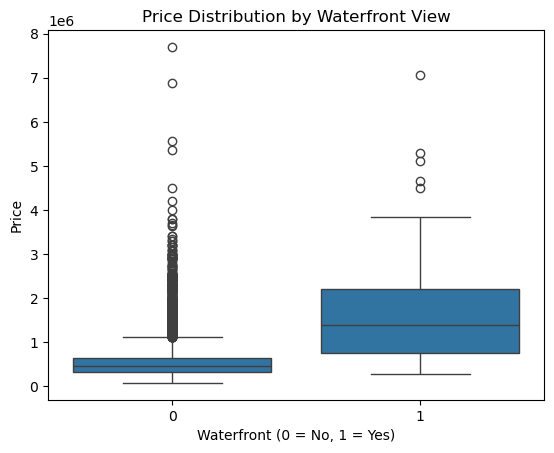

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot of price vs. waterfront
sns.boxplot(x='waterfront', y='price', data=df)

# Show the plot
plt.title("Price Distribution by Waterfront View")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()

# 5. Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price. Take a screenshot of the plot and the code used to generate it.

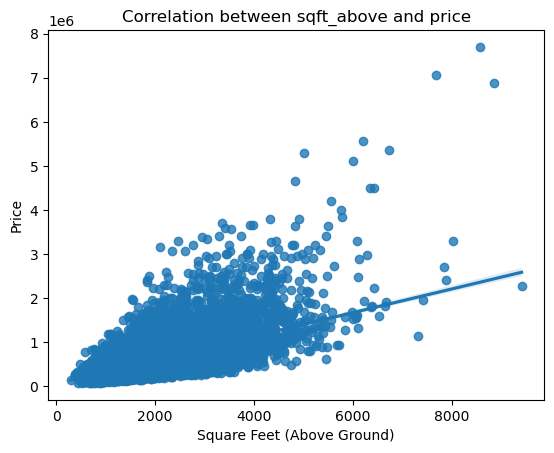

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot for sqft_above vs price
sns.regplot(x='sqft_above', y='price', data=df)

# Customize the plot
plt.title('Correlation between sqft_above and price')
plt.xlabel('Square Feet (Above Ground)')
plt.ylabel('Price')
plt.show()

# 6. Fit a linear regression model to predict the price using the feature 'sqft_living', then calculate the R^2. Take a screenshot of your code and the value of the R^2

In [57]:
from sklearn.linear_model import LinearRegression

# Define the feature and target
X = df[['sqft_living']]
y = df['price']

# Create and fit the model
lm = LinearRegression()
lm.fit(X, y)

# Calculate R^2
r2 = lm.score(X, y)
print("R² (sqft_living → price):", r2)

R² (sqft_living → price): 0.4928532179037931


# 7. Fit a linear regression model to predict the 'price' using the list of features:

"floors"
"waterfront"
"lat"
"bedrooms"
"sqft_basement"
"view"
"bathrooms"
"sqft_living15"
"sqft_above"
"grade"
"sqft_living"

In [60]:
features = [
    "floors",
    "waterfront",
    "lat",
    "bedrooms",
    "sqft_basement",
    "view",
    "bathrooms",
    "sqft_living15",
    "sqft_above",
    "grade",
    "sqft_living"
]

from sklearn.linear_model import LinearRegression

# Define features (X) and target (y)
X_multi = df[features]
y = df['price']

# Create and fit the linear regression model
lm_multi = LinearRegression()
lm_multi.fit(X_multi, y)

# Calculate R^2
r2_multi = lm_multi.score(X_multi, y)
print("R² (multiple features → price):", r2_multi)

R² (multiple features → price): 0.6576763677705644


# 8. Create a pipeline object that scales the data, performs a polynomial transform, and fits a linear regression model. Fit the object using the features in the question above, then fit the model and calculate the R^2.

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Use the same feature list from step 7
features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

X = df[features]
y = df['price']

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X, y)

# Calculate and print R^2
r2_pipeline = pipeline.score(X, y)
print("R² (Polynomial Pipeline):", r2_pipeline)

R² (Polynomial Pipeline): 0.751307099734056


# 9. Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1, and calculate the R^2 using the test data

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Define features and target
features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

X = df[features]
y = df['price']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit Ridge regression model with alpha = 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Calculate R² using test data
r2_ridge = ridge_model.score(X_test, y_test)
print("R² (Ridge Regression, alpha=0.1):", r2_ridge)

R² (Ridge Regression, alpha=0.1): 0.6614734596866669


# 10. Perform a second-order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularization parameter to 0.1. Calculate the R^2 utilizing the test data provided.

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Step 1: Define features and target
features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

X = df[features]
y = df['price']

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Polynomial transform (degree=2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Step 4: Fit Ridge regression with alpha=0.1
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

# Step 5: Calculate R² on test data
r2_poly_ridge = ridge_poly.score(X_test_poly, y_test)
print("R² (Polynomial Ridge, alpha=0.1):", r2_poly_ridge)

R² (Polynomial Ridge, alpha=0.1): 0.7003486856730364
